<a href="https://colab.research.google.com/github/leSIMPus/pipi/blob/master/pipaCOLAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
class Student:
    def __init__(self, name,  group, grades):
        self.name = name
        self.group = group
        self.grades = grades

    def avg(self):
        return sum(self.grades) / len(self.grades)

    def ie(self):
        return self.avg() >= 4.5

students = []
with open("students.txt", "r", encoding="utf-8") as f:
    for line in f:
        line = line.strip()
        if line:
            name, group, grades_str = line.split(";")
            grades = list(map(int, grades_str.split(",")))
            students.append(Student(name, group, grades))

with open("excellent_students.txt", "w", encoding="utf-8") as f:
    for student in students:
        if student.ie():
            f.write(f"{student.name} - {student.group}\n")

from  collections import defaultdict
group_grades = defaultdict(list)
for student in students:
    group_grades[student.group].append(student.avg())
for group, averages in group_grades.items():
    group_average = sum(averages) / len(averages)
    print(f"Средний балл группы {group}: {group_average:2f}")


Средний балл группы A: 4.083333
Средний балл группы B: 3.444444
Средний балл группы C: 3.666667


In [7]:
import re

with open("log.txt", "r", encoding="utf-8") as f:
    log_data = f.read()

ips = re.findall(r"\b\d{1,3}(?:\.\d{1,3}){3}\b", log_data)
timestamps = re.findall(r"\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}", log_data)
upper_words = re.findall(r"\b[A-Z]{2,}\b", log_data)
anonymus = re.sub(r"[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}", "[EMAIL PROTECTED]", log_data)

# Выводим результаты
print("IPv4-адреса:", ips)
print("Временные метки:", timestamps)
print("Слова в верхнем регистре:", upper_words)
print("\n--- Лог после замены email ---\n")
print(anonymus)

IP-адреса: ['192.168.0.1', '10.0.0.45', '172.16.5.100']
Временные метки: ['2025-09-18 14:23:45', '2025-09-18 14:24:01', '2025-09-18 14:25:10', '2025-09-18 14:26:55', '2025-09-18 14:27:30', '2025-09-18 14:28:05', '2025-09-18 14:29:15']
Слова в верхнем регистре: ['INFO', 'WARNING', 'LOST', 'SERVER', 'ERROR', 'INFO', 'ADMIN', 'EXAMPLE', 'COM', 'INFO', 'CRITICAL', 'SYSTEM', 'FAILURE', 'INFO']

--- Лог после замены email ---

2025-09-18 14:23:45 INFO User login from 192.168.0.1
2025-09-18 14:24:01 WARNING Connection LOST to SERVER
2025-09-18 14:25:10 ERROR Invalid password attempt from 10.0.0.45
2025-09-18 14:26:55 INFO Email sent to [EMAIL PROTECTED]
2025-09-18 14:27:30 INFO User [EMAIL PROTECTED] disconnected
2025-09-18 14:28:05 CRITICAL SYSTEM FAILURE at 172.16.5.100
2025-09-18 14:29:15 INFO User [EMAIL PROTECTED] reconnected


Исходные данные:
     Товар     Цена  Количество
0    Хлеб     50.0          10
1  Молоко      NaN           5
2  Яблоки    120.0        2000
3    Хлеб     55.0           3
4  Молоко     52.0           0
5  Яблоки      NaN           7
6    Хлеб  10000.0           2 

После заполнения пропусков в 'Цена':
     Товар     Цена  Количество
0    Хлеб     50.0          10
1  Молоко     55.0           5
2  Яблоки    120.0        2000
3    Хлеб     55.0           3
4  Молоко     52.0           0
5  Яблоки     55.0           7
6    Хлеб  10000.0           2 

После удаления выбросов в 'Количество':
     Товар     Цена  Количество
0    Хлеб     50.0          10
1  Молоко     55.0           5
3    Хлеб     55.0           3
5  Яблоки     55.0           7
6    Хлеб  10000.0           2 

С добавленным столбцом 'Общая_стоимость':
     Товар     Цена  Количество  Общая_стоимость
0    Хлеб     50.0          10            500.0
1  Молоко     55.0           5            275.0
3    Хлеб     55.0          

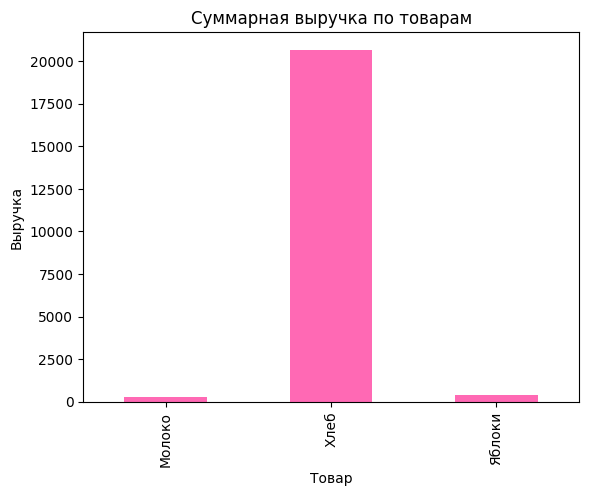

In [15]:
import pandas as pd

df = pd.read_csv("sales_data.csv")
print("Исходные данные:\n", df, "\n")

median_price = df["Цена"].median()
df["Цена"] = df["Цена"].fillna(median_price)
print("После заполнения пропусков в 'Цена':\n", df, "\n")

df = df[(df["Количество"] >= 1) & (df["Количество"] <= 1000)]
print("После удаления выбросов в 'Количество':\n", df, "\n")

df["Общая_стоимость"] = df["Цена"] * df["Количество"]
print("С добавленным столбцом 'Общая_стоимость':\n", df, "\n")

revenue = df.groupby("Товар")["Общая_стоимость"].sum()
print("Суммарная выручка по товарам:\n", revenue, "\n")

import matplotlib.pyplot as plt

revenue.plot(kind="bar", color="hotpink")
plt.xlabel("Товар")
plt.ylabel("Выручка")
plt.title("Суммарная выручка по товарам")
plt.show()

In [36]:
import math

def safe_apply(func, data):
    results = []
    errors = []

    for item in data:
        try:
            result = func(item)
            results.append(result)
        except Exception as e:
            errors.append((item, type(e).__name__))

    return results, errors

data = ['4', '16', 'text', '-25', '9.0']
sqrt_func = lambda x: math.sqrt(float(x))
results, errors = safe_apply(sqrt_func, data)

print("Результаты:", results)
print("Ошибки:", errors)

Результаты: [2.0, 4.0, 3.0]
Ошибки: [('text', 'ValueError'), ('-25', 'ValueError')]


In [43]:
import numpy as np
import math
import time

class Timer:
    def __enter__(self):
        self.start = time.time()
        return self
    def __exit__(self, exc_type, exc_value, traceback):
        self.end = time.time()
        print(f"Время выполнения: {self.end - self.start:.4f} секунд")

with Timer():

    A = np.random.randint(1, 11, size=(5, 5))
    B = np.random.randint(1, 11, size=(5, 5))

    print("Матрица A:\n", A)
    print("Матрица B:\n", B)

    pipa = A * B
    print("\nПоэлементное произведение A * B:\n", pipa)

    mat = A @ B
    print("\nМатричное произведение A @ B:\n", mat)

    detkA = np.linalg.det(A)
    print("\nОпределитель матрицы A:", detkA)

    Biba = B.T
    print("\nТранспонированная матрица B:\n", Biba)

    if detkA != 0:
        A_inv = np.linalg.inv(A)
        print("\nОбратная матрица A:\n", A_inv)
    else:
        print("\nОбратная матрица не существует")

    C = A.sum(axis=1)
    if detkA != 0:
        x = np.linalg.solve(A, C)
        print("\nРешение системы A*x = C:\n", x)
    else:
        print("\nСистема не решается, так как обратной матрицы к А не существует.")

Матрица A:
 [[ 7  3  6  8  8]
 [10  5  6 10  6]
 [ 9 10  2  6  2]
 [ 6  1  2  2  4]
 [ 4  6  6 10  8]]
Матрица B:
 [[ 7  4  4  8  3]
 [ 8 10  8  2  6]
 [ 5  2  4 10  5]
 [ 6  4  3 10  8]
 [ 9  7  9  6  7]]

Поэлементное произведение A * B:
 [[49 12 24 64 24]
 [80 50 48 20 36]
 [45 20  8 60 10]
 [36  4  6 20 32]
 [36 42 54 60 56]]

Матричное произведение A @ B:
 [[223 158 172 250 189]
 [254 184 188 286 212]
 [207 178 160 184 159]
 [108  74  82 114  78]
 [238 184 190 252 214]]

Определитель матрицы A: -616.0000000000015

Транспонированная матрица B:
 [[ 7  8  5  6  9]
 [ 4 10  2  4  7]
 [ 4  8  4  3  9]
 [ 8  2 10 10  6]
 [ 3  6  5  8  7]]

Обратная матрица A:
 [[-0.12987013  0.11688312 -0.01298701  0.16883117 -0.03896104]
 [ 0.5974026  -0.33766234  0.25974026 -0.37662338 -0.22077922]
 [ 3.05844156 -0.9025974   0.65584416 -2.02597403 -1.53246753]
 [-1.59090909  0.68181818 -0.40909091  0.81818182  0.77272727]
 [-0.68831169  0.01948052 -0.16883117  0.69480519  0.49350649]]

Решение системы

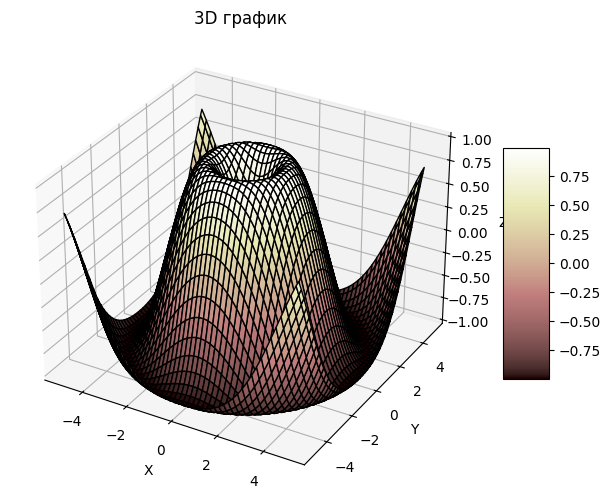

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

Z = np.sin(np.sqrt(X**2 + Y**2))

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap='pink', edgecolor='k')
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D график')

plt.show()